## Modeling Epidemics with the SIR Model

### By: Antony Sikorski

##### Sources: 
- https://jaydaigle.net/blog/the-sir-model-of-epidemics/
- https://www.tnstate.edu/mathematics/mathreu/filesreu/GroupProjectSIR.pdf
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
- https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/desolvers.html#sage.calculus.desolvers.desolve_odeint
- https://www.math.ust.hk/~machas/differential-equations.pdf
- https://www.census.gov/quickfacts/fact/table/sandiegocountycalifornia,CA/PST045219
- https://www.healthline.com/health/r-nought-reproduction-number
- http://howellkb.uah.edu/DE2/Lecture%20Notes/DE1Review.pdf
- https://ncc.metu.edu.tr/sites/default/files/ODE-Review.pdf
- https://arxiv.org/pdf/1403.2160.pdf

## What are Differential Equations?

Differential equations are equations that contain the derivative of a function that we do not know. These equations are often referred to as DE's. Since a basic knowledge in calculus and differential techniques is a requirement for this class, we will primarily spend time reviewing the methods necessary for the second part of the presentation. 

Differential equations are split into two main categories: ODE's and PDE's. 

- ODE stands for Ordinary Differential equations, meaning the derivatives that exist within the equation are of only one function, and are effectively the "ordinary" derivatives that we learned in early calculus. 
    
- PDE stands for Partial Differential equations, meaning the derivatives can be of more than one function, and comprise the rest of differential equations. 

Today, we will be using only ODE's, as the the model that we will examine later does not require PDE's. In fact, each one of our equations will only contain one derivative in it!

#### Terminology and Classification

It is useful to go over a few key terms before we dive in, including some classifications of differential equations: 

- Type: Differential equations are split between ODE's and PDE's, as previously discussed. 

- Order: The order of a differential equation is the highest order derivative that appears in our equation (first, second, .... nth).
    - For example: the order of the equation $\frac{d^{2}y}{dx^{2}} = \frac{dy}{dx} + 2y + ln(3x) + x^{2}$ is 2. This is quite obvious since the highest order derivative that is present is the second order derivative.
    
<p>

- Linearity: A differential equation is linear if it only contains terms that are linear for the dependent variables or it's derivatives. This means that the dependent variable and it's derivatives cannot have any products with or between each other. Non-linear equations are much more difficult to solve, and often do not have a general solution, making them quite chaotic.
    
    - Non-linear differential equation example: $(\frac{dy}{dx})^{2} + 2y^{2}x + x^2 = 0$ This is clearly non-linear due to both the $y$ and it's derivative being squared.
    
    - The second order example above suffices as an example of a linear differential equation.
    
<p>

- Homogenity: A homogenous DE contains only derivatives of the dependent variable and terms involving it, and is set to zero, while a nonhomogenous differential equation can have terms involving just the independent variable, and is set equal to to them. A little picture example never hurt anybody:
    
    <img src="difeqpres1.JPG" width = "50%">
    
- Solution: A function that satisfies our equation.

- Initial values: Initial conditions that present some values that help in our integration or solution process. 

## Solving ODE's

As I mentioned earlier, we will only need to solve basic differential equations for this topic, so let's (remember how to) solve them by hand, and (learn how to) solve them using SageMath. 

To begin, a little Sage review wouldn't hurt:

Sage already thinks of x as a special variable, so we will use it as our independent one. 

In [1]:
import numpy as np
print(x)
type(x)

x


<class 'sage.symbolic.expression.Expression'>

Next, let's define a function, $y = f(x)$. 

In [2]:
y = 3*x^3 + 2*x - 7*sin(9*x)
show(y)

3*x^3 + 2*x - 7*sin(9*x)

In order to take the derivative of this function, we utilize Sage's diff command. 

In [3]:
deriv1 = diff(y)
show(deriv1)

9*x^2 - 63*cos(9*x) + 2

### Solving by Hand

Now, jumping into some actual differential equations. Let's say I want to find the general solution of this equation. As we can tell just by looking at it, this is a very simple, separable, first order differential equation. Separating it an integrating it should do the trick:

$$\frac{dy}{dx} = \frac{x^2 + 1}{3y}$$

First I would begin by separating the two sides, and rewriting with the integral sign on both sides:

$$\int 3y * dy = \int (x^2 + 1) * dx$$

Integrating this would lead to:

$$\frac{3y^2}{2} = \frac{x^3}{3} + x + C$$

Now, if we had some initial conditions, we could find an exact solution to this equation, eliminating the $C$ variable. Let's say $y(1) = 2$.

$$\frac{12}{2} = \frac{1}{3} + 1 + C$$
$$ C = \frac{14}{3} $$

so the particular solution is

$$\frac{3y^2}{2} = \frac{x^3}{3} + x + \frac{14}{3}$$

which simplifies to 

$$ y = \sqrt{\frac{2x^3}{9} + \frac{2x}{3}+\frac{28}{9}}$$

# *** Participation Check ***

Solve the equation $$f''(x) = \frac{4x^2}{27} + \frac{2}{9}$$
given that $f'(0) = 1, f(3) = 16$

Answer:

$$f''(x) = \frac{4x^2}{27} + \frac{2}{9}, f'(0) = 1, f(3) = 16$$

$$\int f''(x) = f'(x) = \frac{4x^3}{81} + \frac{2x}{9} + C_{1}$$

Using the initial condition that $f'(0) = 1$:

$$1 = 0 + C_{1} \Rightarrow C_{1} = 1 \Rightarrow f'(x) = \frac{4x^3}{81} + \frac{2x}{9} + 1$$

$$\int f'(x) = f(x) = \frac{x^4}{81} + \frac{x^2}{9} + x + C_{2}$$

Using the initial condition that $f(3) = 16$:

$$16 = 1 + 1 + 3 + C_{2} \Rightarrow C_{2} = 11$$

So our final answer is:

$$f(x) = \frac{x^4}{81} + \frac{x^2}{9} + x + 11$$

# ****************************

### Solving with Sage

This is a bit easier to do using SageMath. Let's first solve for the general solution of our equation, using Sage's "desolve" command.

In [4]:
#First, we define a variable, x. 
x = var('x')

#Next, we define y as a function of x.
y = function('y')(x)

#The derivative of y in terms of x is written as diff(y,x). We utilize Sage's "desolve" function to find our general solution. 
generalSol = desolve(diff (y,x) == ((x^2) + 1)/(3*y), y)
show(generalSol)

3/2*y(x)^2 == 1/3*x^3 + _C + x

Now let's make a minor change to our command to solve the equation with initial conditions. 

In [5]:
#We implement the "ics" function, which in this case says that at x = 1, y = 2.
particularSol = desolve(diff (y,x) == ((x^2) + 1)/(3*y), y, ics = [1,2])
show(particularSol)

3/2*y(x)^2 == 1/3*x^3 + x + 14/3

We can also spice things up by not just solving one equation, but by solving a system. We utilize the desolve_odeint command for this procedure. 

In [6]:
#setting both x and y as variables
x,y = var('x,y')

# setting up our system of two example equations. Let's imagine our independent variable is time (t), and x(0) = 10, y(0) = 24
f = [x*(y^2 + 1), 4*y*x]

#this will produce a set of points of step size 0.1 which are solutions to this set of equations. It may be useful to graph this solution curve...
solution = desolve_odeint(f, [10,24],srange(0,10,0.1),[x,y])
show(solution)

/ext/sage/sage-9.2/local/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


array([[ 1.00000000e+001,  2.40000000e+001],
       [ 1.89854773e+010,  3.89722722e+005],
       [ 3.31028205e+127,  4.83245961e+276],
       [ 1.81959563e-280,  8.97047371e+221],
       [-3.38460789e+125,  8.32001443e+016],
       [ 1.08173078e-307,  1.28510880e+164],
       [ 5.21675519e-307,  1.33360333e+241],
       [ 4.91326905e-310,  2.09329553e+137],
       [ 1.98290560e-312,  2.60837760e-307],
       [ 5.25189968e+127,  5.69315555e+228],
       [ 6.79316720e+247,  1.33538831e+185],
       [ 2.16432687e+233,  4.98112464e+127],
       [ 3.68572446e+180,  5.53220154e+127],
       [ 6.96764197e+252,  1.44312396e-251],
       [ 3.99726796e+252,  7.27427266e+199],
       [ 6.96764194e+252,  2.77935564e-285],
       [ 4.33425669e+127,  4.64500809e+151],
       [ 1.17469457e+214,  1.17049471e+214],
       [ 1.58650005e-239,  1.69374419e+190],
       [ 8.45283575e+252,  2.38608480e-312],
       [ 1.42499640e-065,  1.12102932e+243],
       [ 5.62472218e-254,  3.67143260e+228],
       [ 1.68563624e+069,  2.40430050e-244],
       [ 5.56120605e+107,  1.88688192e+087],
       [ 9.53612559e+150,  9.55488092e+067],
       [ 3.50593521e+064,  2.87499947e+161],
       [ 3.17488113e+127,  7.58561964e+228],
       [ 1.74678447e+243,  4.73168858e+178],
       [ 9.86555711e-300,  1.14448785e+243],
       [ 1.19351156e+190,  1.96263529e+243],
       [ 7.33723139e+223, -5.53215178e+127],
       [ 8.30204956e+173,  1.14010384e+243],
       [ 7.34069533e+223,  3.14870761e+161],
       [ 3.00384344e-273,  1.96805628e+243],
       [ 6.43431564e-310,  1.67501175e+243],
       [ 1.58959725e+219,  2.08900539e-312],
       [ 1.31353237e-308,  9.12488547e+192],
       [ 6.84235885e-312,  9.12107842e-304],
       [ 8.20430627e-304, -1.18893476e+270],
       [ 1.09385605e-303,  1.36727729e-303],
       [ 2.18771487e-303,  1.18499091e-303],
       [ 1.07536213e-298,  6.26469856e-294],
       [ 1.93242363e-284,  7.16983424e-299],
       [ 8.20430629e-304,  4.10782329e-294],
       [ 7.83040738e-294,  9.11571045e-304],
       [ 9.11594684e-304,  9.11756002e-304],
       [ 9.11571042e-304,  7.76601104e-299],
       [ 5.97413580e-299,  1.27630793e-303],
       [ 7.16866764e-299,  9.11753223e-304],
       [ 2.79772421e-309,  2.78681707e-309],
       [ 4.96512936e-270,  1.07560456e-298],
       [ 1.00271563e-303,  7.76711384e-299],
       [ 5.87243515e-294,  1.09385187e-303],
       [ 1.27613271e-303,  1.36727590e-303],
       [ 9.11575214e-304,  1.07535665e-298],
       [ 1.18498951e-303,  9.56783153e-304],
       [ 1.19482898e-298,  1.00270868e-303],
       [ 8.29544332e-275,  7.54792835e+168],
       [ 4.94065646e-324,  4.66839074e-313],
       [ 1.42173718e-312,  1.49768526e+135],
       [ 1.55582292e+294,  1.71549243e+294],
       [ 2.11847955e+289,  1.28357491e+294],
       [ 5.68572199e+173,  1.70184569e+241],
       [ 5.01753795e+202,  1.39802679e+294],
       [ 3.10442751e+289,  1.54553434e+294],
       [ 5.01757482e+202,  3.10442380e+289],
       [ 1.86359377e+135,  4.01714454e+289],
       [ 1.29449493e+294,  2.03524260e+241],
       [ 2.86079466e+289,  1.54553434e+294],
       [ 3.59171367e+289,  1.05564018e+251],
       [-3.79513186e-294,  7.09655448e+292],
       [ 1.78939634e+294,  1.96003417e+289],
       [ 3.34808268e+289,  1.28482888e+294],
       [ 1.28453043e+294,  3.22624951e+289],
       [ 2.86080024e+289,  1.46881909e+294],
       [ 4.99073910e+289,  3.39395599e-111],
       [ 1.33360304e+241,  7.85138443e-312],
       [ 4.90354478e+252,  3.30908661e+257],
       [-5.25929285e+127,  5.24978563e+170],
       [ 1.33360333e+241,  1.33859478e+161],
       [ 4.25109764e+228,  7.49917663e+247],
       [ 8.19690489e+247,  1.08168141e-307],
       [ 1.33360364e+241,  2.08915544e+214],
       [ 7.27939457e-306,  1.33360363e+241],
       [-2.57328017e+127,  1.96248708e+243],
       [ 6.02669629e+175,  6.36088592e-295],
       [ 1.09477094e-065,  6.06276553e-066],
       [ 3.42589350e-312,  1.38455221e-305],
       [ 4.41540246e+199,  9.92178381e+2

# *** Participation Check ***

Solve the second order differential equation with different initial conditions from the first participation check using SageMath's desolve function.
Here are the different initial conditions: 

$$f'(0) = 1, f(0) = 11$$

Hint: diff(y,x) is not the full command. It is actually diff(y, x, n). I'm sure you can guess what the n represents. Additionally, multiple ics can be implemented in the function, in the form [x, f(x), f'(x)].

Answer:
You should have gotten the exact same solution as the one in the "by hand" participation check!

In [7]:
x = var('x')
y = function('y')(x)

solution = desolve(diff (y,x,2) == ((4*x^2)/27 + (2/9)), y, ics = [0,11, 1])
show(solution)

1/81*x^4 + 1/9*x^2 + x + 11

# ****************************

### Additional Notes/Limitations

A major issue with the SageMath desolve function is the fact that it can only solve second order differential equations.

In [8]:
solution = desolve(diff (y,x,3) == ((4*x^2)/27 + (2/9)), y, ics = [0,11, 1, 4])
show(solution)

NotImplementedError: Maxima was unable to solve this ODE. Consider to set option contrib_ode to True.

The above code most likely resulted in an error. In addition to this, SageMath requires you to input values for the same x when solving higher order differential equations, so the initial conditions $f(x), f'(x), ... f^{n}(x)$ must all be for the same $x$. This is why it was impossible to solve the earlier participation check with the "by-hand" initial conditions.

Despite these limitations, Sage is quite powerful when it comes to solving differential equations. So far we have only studied quite basic, first and second order differential equations. Sage has many more functions that solve differential equations in ways that we have both previously seen in 20D, and in more complex methods that are most likely taught in MATH 110, 130, and higher level graduate classes. Unfortunately, I do not have the time to delve into these, but I believe that these are a few important examples:

- desolve_laplace: This will solve a differential equation using LaPlace transforms, a convenient technique that was learned near the end of 20D. 
- desolve_system: The name gives it away (this solves a system of first order ODE's)
- eulers_method: Approximates solutions to a differential equation via a table
- desolve_minitides: Uses a Taylor series integrator method to solve a system of first order differential equations. 

In addition to all of this, computers are simply much better at doing these types of calculations that people. I'll give a fun example of an ugly ODE that none of us would ever want to solve by hand that Sage does using Laplace transforms in roughly 0.02 seconds.

In [9]:
import time
a = time.time()

funprob = desolve_laplace(diff(y,x,2) + 2*x*diff(y,x) + y, y)
show(funprob)

b = time.time()
print((b-a))

ilt((g1829*y(0) + 2*g1829*D[2](laplace)(y(x), x, g1829) + D[0](y)(0))/(g1829^2 - 1), g1829, x)

0.10123205184936523


### Visualizing our Solutions

It is often useful to plot solution curves to our differential equations in order to better understand the nature of the problem that we are dealing with. This method is often used to examine difficult problems in various scientific fields. This will mostly be a showcase of a few different way one can plot using both Sage and SciPy, since the two methods are quite similar. 

Let's plot the solution curve to one of our previous equations. It's actually quite simple. Let's use the first equation we did in Sage.

3/2*y(x)^2 == 1/3*x^3 + x + 14/3


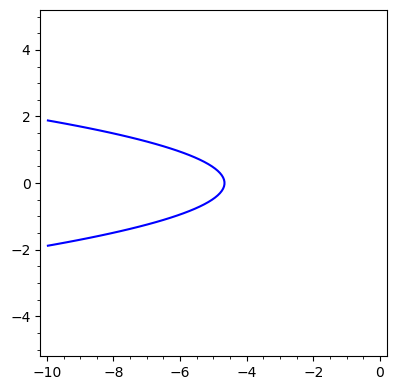

In [10]:
x = var('x')
y = function('y')(x)
generalSol = desolve(diff (y,x) == ((x^2) + 1)/(3*y), y, ics = [1,2])
print(generalSol)

#Defining variables
var('x,y')
#Our solution function
g(x,y) = (3/2)*(y^2) + x + (14/3)
plotty = implicit_plot(g(x,y) == 0, xrange = (-10,0), yrange = (-5,5))
show(plotty)

Or, let's plot the solution curve to the system of differential equations that we solved earlier.

/ext/sage/sage-9.2/local/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


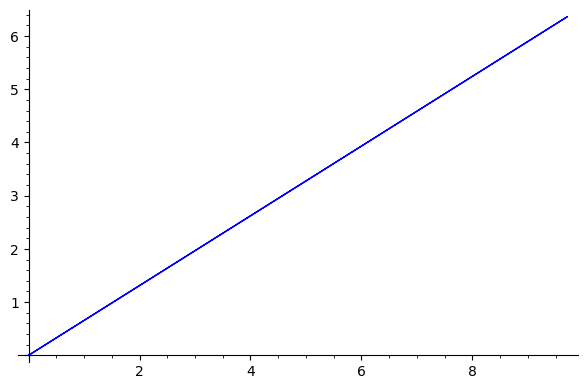

In [1]:
x,y = var('x,y')

f = [x*(y^2 + 1), 4*y*x]

solution = desolve_odeint(f, [10,24],srange(0,10,0.1),[x,y])

plotty = line(zip(solution[:,0], solution[:,1]))
show(plotty)

### Spicy Method

There is also a very useful, quick way to use SCIPY (lol, which is often used for graphing the solution curve of one or more differential equations. Here is a quick walkthrough:

[<matplotlib.lines.Line2D object at 0x7efedd653b80>]

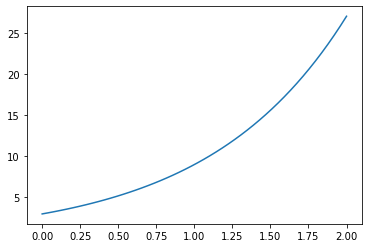

In [12]:
from scipy.integrate import odeint
import matplotlib.pyplot as plotter

#in scipy, we write a function that models our differential equation (or system)
def Derive(y,x):
    dydx = 0.1*y + y
    return dydx

#we set an initial condition for later
y0 = 3

#setting the time points for our axis
x = np.linspace(0,2)

#we use Scipys "odeint" function to integrate the differential equation (or system)
y = odeint(Derive,y0,x)

plotty = plotter.plot(x,y)
show(plotty)

Here is the resulting solution curve for our differential equation. 

## Modeling Epidemics Using the SIR Model

One of the beautiful aspects of mathematics is that it can be used in nearly every field to yield some form of information that could better help solve a problem. As you all well know, we are in the middle of a global pandemic. Conveniently enough, mathematical modeling via differential equations can be used to model many aspects of disease spreading, and can help us gain a better understanding of what we are dealing with in difficult times like this. So let's learn about the SIR model, a very basic epidemiological model that consists of a set of differential equations to visualize our situation. 

The SIR model was developed by y A. G. McKendrick and W. O Kermack in 1927 to predict the behavior of epidemic outbreaks. 

SIR stands for Susceptible, Infected, and Recovered. We can write these as functions, where $S$ is the number of susceptible people in the population, $I$ is the number of infected people, $R$ is the number of recovered people, and $N$ is the total population, where $N = S + I + R$. 

We need as probability of recovery, which is dependent on the time it takes to recover from the disease. For example, for some random disease, let's assume studies show that it takes a person an average of 11 days to recover. So we can make the basic assumption that each day, people have the chance $p = \frac{1}{11}$ of recovery. This means $pI$ people recover daily. 

There is also a probability of getting infected, which depends on the number of people encountered per day, the number of them that are sick, and the chance that they actually transmit the disease. The fraction of sick people can be expressed as $\frac{I}{N}$, and the other two are grouped into a single variable $q$. So the chance of getting sick is $\frac{qI}{N}$.

An infected person is sick for $\frac{1}{p}$ days, and they infect $q$ people each day, so $\frac{q}{p}$ people get infected each day. 

Now we are ready to set up our equations. Time will be set to $t$, and we will measure in one day intervals.

The change of recovery over time depends on the number of people who recover each day, so 

$$\frac{dR}{dt} = pI$$

The change in susceptible people each day will decrease, and is dependent on people infected each day, so

$$\frac{dS}{dt} = -\frac{qI}{N} * S$$

The change in infected people is dependent on the last two, and will most likely increase, peak, and then decrease, since it is dependent on susceptibility, recovery, and infection rate. 

$$\frac{dI}{dt} = (\frac{qI}{N}* S) - pI$$

Now let's implement our model in Sage:

In [13]:
#Let's assume a population of 1000 people. 
N = 1000

#Meet patient zero
I0 = 1
R0 = 0
S0 = N - R0 - I0

#The ratio of q/p is quite important sometimes as it represents contact rate, but in this case I'm just picking random numbers that look like the ones I've seen in research papers. Let's just assume we are dealing with "Virus 18", with a ratio of about 1.56.
q = 0.15

p = 0.09

#Modeling one year
t = np.linspace(0,365,365
)

# *** Participation Check ***

Set up a function "Derivative", that returns the system of differential equations, similar to our "Derive" function in the Spicy method.

In [14]:
#Your code goes here:
def Derivative(Y,t, N, q, p):
    ################
    return dSdt, dIdt, dRdt

Answer:

In [15]:
def Derivative(Y, t, N, q, p):
    S, I, R = Y
    
    dSdt = (-q * S * I)/N
    dIdt = (q * S * I)/N - (p * I)
    dRdt = p * I 
    
    return dSdt, dIdt, dRdt

# ****************************

All we have left to do is to solve the system, and then plot it. 

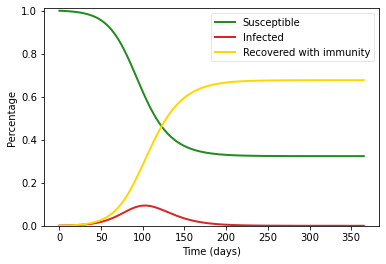

In [16]:
#Initial conditions
Y0 = S0, I0, R0

#Solve the system using odeint
solve = odeint(Derivative, Y0, t, args = (N, q, p))
S, I, R = solve.T


#plotting code from SciPy themselves
fig = plotter.figure(facecolor='w')
sub = fig.add_subplot(111, facecolor='w', axisbelow=True)
sub.plot(t, S/1000, 'forestgreen', alpha=1, lw=2, label='Susceptible')
sub.plot(t, I/1000, 'tab:red', alpha=1, lw=2, label='Infected')
sub.plot(t, R/1000, 'gold', alpha=1, lw=2, label='Recovered with immunity')
sub.set_xlabel('Time (days)')
sub.set_ylabel('Percentage')
sub.set_ylim(0,1.01)

sub.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = sub.legend()
legend.get_frame().set_alpha(0.5)
plotter.show()

Voila, a beautiful and simple representation of the epidemic of our made up disease (Virus 18) and it's development via our three categories of people. 

### Conclusion and Limitations

This model allows us to deduce a lot about an epidemic, such as when it will peak, at what point in time will the most people be infected at once, how many people can get infected at once, and many other relevant questions. Obviously it is missing many things that a real-world epidemiological model would need. The model assumes immunity after recovery, with zero chance of re-infection. As we have seen before, this is obviously not always true. It also assumes a static population, without accounting for travel, birth, and death. It assumes no precautions are taken, and has no data on asymptomatic carriers and unreported cases. Finally, it assumes that the transmission rate is constant, which often is untrue due to virus mutation and other factors. Overall, this is a simple, one peak model, and is not the best choice when many lives are on the line, but it is a great indtroduction to how differential equations are used to model relevant processes. 

### Thank You!

# Homework Exercises

### Exercise 1: The Electric Dipole 

If you do this problem correctly, you will know exactly why it is named the way that it is. 

a. Begin by finding the particular solutions to these two differential equations given their initial conditions:

$$\frac{df(x)}{dx} = \frac{x}{y}, f(4) = 3\sqrt{2}$$

$$\frac{dg(x)}{dx} = -2y^2, g(\frac{1}{2}) = 1$$

Answer:

In [17]:
#Defining imports as for every homework
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plotter


#Define x as a variable 
x = var('x')

#Next, we define y as a function of x.
y = function('y')(x)

#solving for f(x) given initial conditions
fSol = desolve(diff(y,x) == x/y, y, ics = [4, 2 * 3^(1/2)])
show(fSol)

#solving for g(x) given initial conditions
gSol = desolve(diff(y,x) == -2*y^2, y, ics = [1/2,1])
show(gSol)

1/2*y(x)^2 == 1/2*x^2 - 2

1/2/y(x) == x

b. With both equations as functions of two variables set equal to 1, use the plot_vector_field function, plot the vector field:

$$ V(x,y) = (f(x), g(x))$$

You may need to search up the specific of the plot_vector_field function... maybe use interpolate or "?" $\ddot\smile$

Answer:

To begin, their equations should now be:
$$ 1 = x^2 - y^2 -4 \Rightarrow f(x,y) = x^2 - y^2 -4$$
$$ 1 = 2xy \Rightarrow g(x,y) = 2xy$$

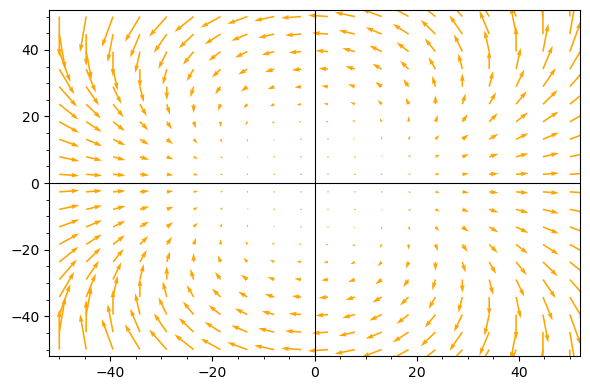

In [18]:
#This will produce a vector field that looks exactly like a simple electric dipole!
var('x,y')
fld = plot_vector_field((x^2 - y^2 -4, 2*x*y), xrange = (-50,50), yrange = (-50,50), color = "orange")
show(fld)

### Exercise 2: Modeling Covid-19

Come on, you really thought we weren't going to model Rona?

a. Recreate the SIR model of differential equations to model the spread of Coronavirus over the course of an academic year (beginning of fall to end of spring) in UCSD students. You will have to do some research in order to determine the population and the ratio of $q$ to $p$ (this golden number is usually called $R_{0}$). Assume we started out with two infected students. Graph it however you would like, so long as it has readable and accurate axis and fun colors.

Hint: Calculating $p$ should be very easy, considering we have been told many times how many days it takes to recover from Covid (on average). 

Answer: 

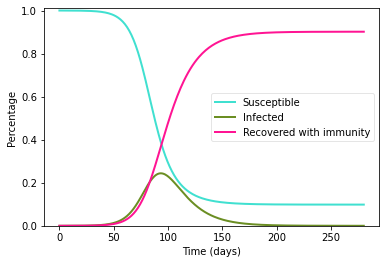

In [19]:
#Population of the UCSD student bodys 
N = 35821

#Meet patients zero and one
I0 = 2
R0 = 0
S0 = N - R0 - I0

#p is 1/14 which is roughly 0.07, since that is the recovery time for Covid-19. R0 must be 2.5ish, so that is how q was calculated. 
q = 0.18

p = 0.07

#Modeling one academic year (roughly)
t = np.linspace(0,280,280)

def Derivative(Y, t, N, q, p):
    S, I, R = Y
    
    dSdt = (-q * S * I)/N
    dIdt = (q * S * I)/N - (p * I)
    dRdt = p * I 
    
    return dSdt, dIdt, dRdt

#Initial conditions
Y0 = S0, I0, R0

#Solve the system using odeint
solve = odeint(Derivative, Y0, t, args = (N, q, p))
S, I, R = solve.T


#nobody does it better than SciPy
fig = plotter.figure(facecolor='w')
sub = fig.add_subplot(111, facecolor='w', axisbelow=True)

#make sure to scare S,I,R accordingly or the graph won't come out right. 
sub.plot(t, S/35821, 'turquoise', alpha=1, lw=2, label='Susceptible')
sub.plot(t, I/35821, 'olivedrab', alpha=1, lw=2, label='Infected')
sub.plot(t, R/35821, 'deeppink', alpha=1, lw=2, label='Recovered with immunity')
sub.set_xlabel('Time (days)')
sub.set_ylabel('Percentage')
sub.set_ylim(0,1.01)

sub.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = sub.legend()
legend.get_frame().set_alpha(0.5)
plotter.show()

b. Let's do some interpretation of our model. During what time will the highest number of students be infected at the same time? What percentage of the population will that be at that time, and how many students is that? Finally, what total percentage of students are expected to get infected? Are these numbers consistent with theoretical estimates for large populations/Covid-19 in general?

Answer:

The highest number of students infected at one time will be right around 95 days into the academic year, and will account for roughly a quarter (25%) of the population being infected at one time. This is roughly 9000 students, or an entire grade. 
The total percentage of students that is supposed to get infected is between 80% and 90%. This is a grim number, and is actually a bit higher than more complex models being used to actually simulate Covid spread. These models predict that 60% of a population will get infected with a consistent $R_{0} = 2.5$. 